In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import pandas as pd

In [22]:
#reading data, coverting all '?' to Nan 
df= pd.read_csv('pakistan_cricket_dataset.csv',sep=',')
df.head(5)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 10 columns):
ConsecutiveWins      95 non-null int64
Season               95 non-null object
Opposition_Others    95 non-null object
Country              95 non-null object
Ground               95 non-null object
Home_Ground          95 non-null object
Day_Night            95 non-null object
PitchReport          95 non-null object
BattingFirst         95 non-null object
Pak_Win              95 non-null object
dtypes: int64(1), object(9)
memory usage: 7.5+ KB


(95, 10)

In [70]:
df.head()

,ConsecutiveWins,Season,Opposition_Others,Country,Ground,Home_Ground,Day_Night,PitchReport,BattingFirst,Pak_Win
0,0,Summer,New Zealand,New Zealand,Wellington,No,Yes,bouncy,Yes,No
1,0,Summer,New Zealand,South Africa,Queenstown,No,No,bouncy,Yes,No
2,0,Summer,New Zealand,New Zealand,Christchurch,No,Yes,bouncy,Yes,Yes
3,1,Summer,New Zealand,New Zealand,Napier,No,Yes,bouncy,No,Yes
4,2,Summer,New Zealand,New Zealand,Hamilton,No,Yes,bouncy,Yes,Yes


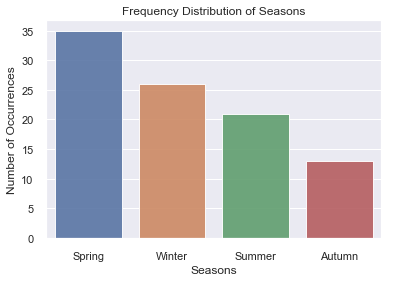

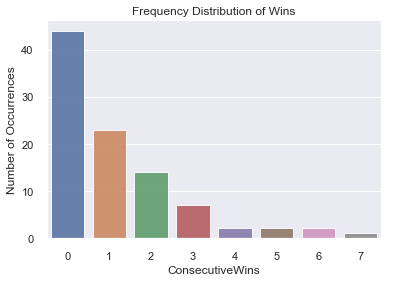

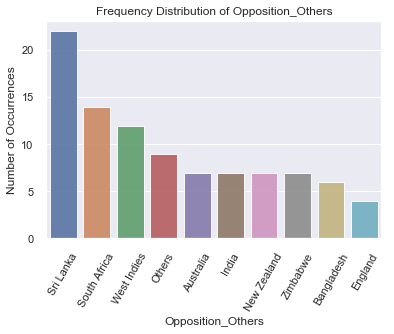

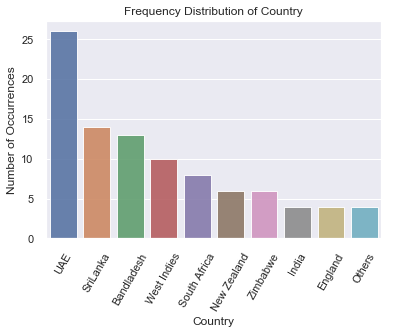

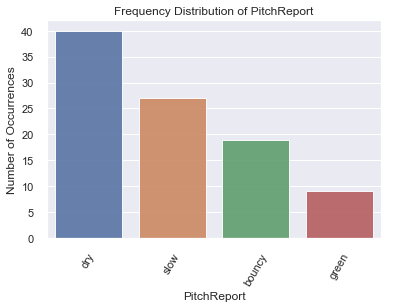

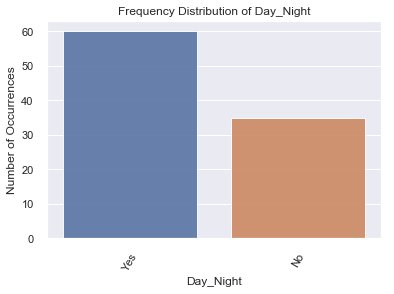

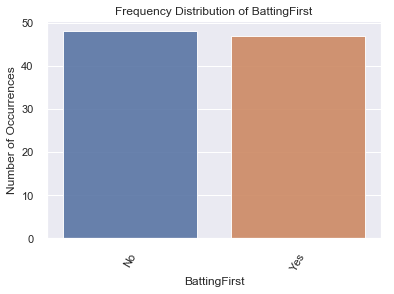

In [23]:
%matplotlib inline
import seaborn as sns
contact_count = df['Season'].value_counts()
sns.set(style="darkgrid")
sns.barplot(contact_count.index, contact_count.values, alpha=0.9)
plt.title('Frequency Distribution of Seasons')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Seasons', fontsize=12)
plt.show()

contact_count = df['ConsecutiveWins'].value_counts()
sns.set(style="darkgrid")
sns.barplot(contact_count.index, contact_count.values, alpha=0.9)
plt.title('Frequency Distribution of Wins')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ConsecutiveWins', fontsize=12)
plt.show()
contact_count = df['Opposition_Others'].value_counts()
sns.set(style="darkgrid")
sns.barplot(contact_count.index, contact_count.values, alpha=0.9)
plt.title('Frequency Distribution of Opposition_Others')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Opposition_Others', fontsize=12)
plt.xticks(rotation = 60)
plt.show()
contact_count = df['Country'].value_counts()
sns.set(style="darkgrid")
sns.barplot(contact_count.index, contact_count.values, alpha=0.9)
plt.title('Frequency Distribution of Country')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation = 60)
plt.show()
contact_count = df['PitchReport'].value_counts()
sns.set(style="darkgrid")
sns.barplot(contact_count.index, contact_count.values, alpha=0.9)
plt.title('Frequency Distribution of PitchReport')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('PitchReport', fontsize=12)
plt.xticks(rotation = 60)
plt.show()
contact_count = df['Day_Night'].value_counts()
sns.set(style="darkgrid")
sns.barplot(contact_count.index, contact_count.values, alpha=0.9)
plt.title('Frequency Distribution of Day_Night')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Day_Night', fontsize=12)
plt.xticks(rotation = 60)
plt.show()

contact_count = df['BattingFirst'].value_counts()
sns.set(style="darkgrid")
sns.barplot(contact_count.index, contact_count.values, alpha=0.9)
plt.title('Frequency Distribution of BattingFirst')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('BattingFirst', fontsize=12)
plt.xticks(rotation = 60)
plt.show()



In [24]:
#Encode the categorical data
for col in df.columns:
    if df[col].dtype==object:
           df[col]=df[col].astype('category')
           df[col]=df[col].cat.codes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 10 columns):
ConsecutiveWins      95 non-null int64
Season               95 non-null int8
Opposition_Others    95 non-null int8
Country              95 non-null int8
Ground               95 non-null int8
Home_Ground          95 non-null int8
Day_Night            95 non-null int8
PitchReport          95 non-null int8
BattingFirst         95 non-null int8
Pak_Win              95 non-null int8
dtypes: int64(1), int8(9)
memory usage: 1.7 KB


In [19]:
df.head(2)

,ConsecutiveWins,Season,Opposition_Others,Country,Ground,Home_Ground,Day_Night,PitchReport,BattingFirst,Pak_Win
0,0,2,4,3,36,0,1,0,1,0
1,0,2,4,5,33,0,0,0,1,0


In [25]:
#dividing the data into attributes and labels
X = df.drop('Pak_Win', axis=1) 
y = df['Pak_Win']  
# Standardizing the features
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)

C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\yellowbrick\features\rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


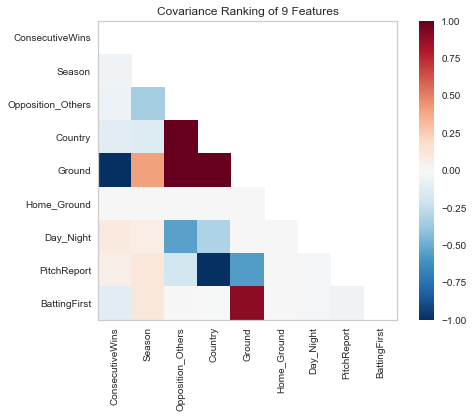

In [14]:
df.head(2)
from yellowbrick.features import Rank2D
features = ['ConsecutiveWins','Season','Opposition_Others','Country','Ground','Home_Ground','Day_Night','PitchReport','BattingFirst']
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data


C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\scipy\stats\morestats.py:1306: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


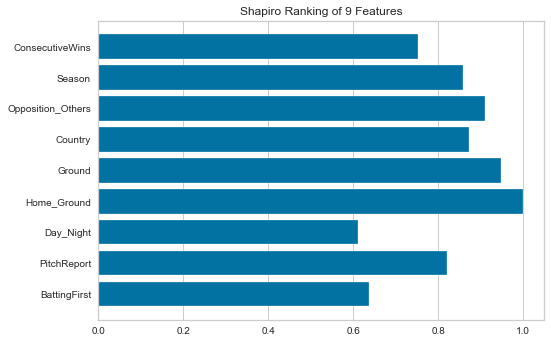

In [34]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data


C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\numpy\lib\function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\numpy\lib\function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


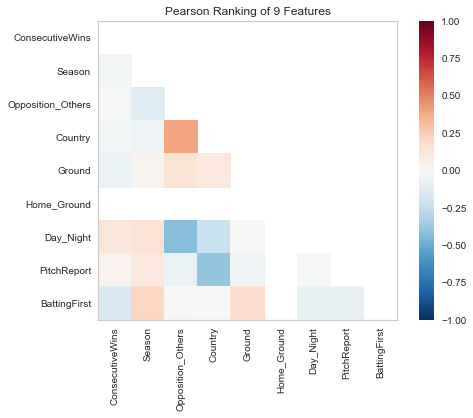

In [35]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

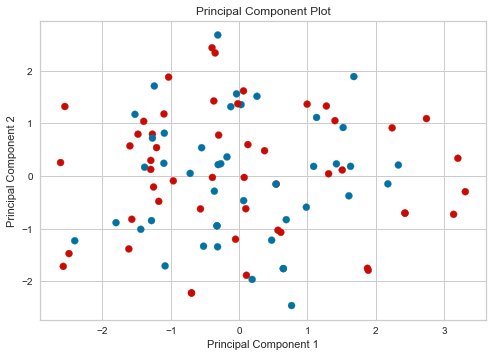

In [36]:
from yellowbrick.features.pca import PCADecomposition
# Create a list of colors to assign to points in the plot
colors = np.array(['r' if yi else 'b' for yi in y])
visualizer = PCADecomposition(scale=True, color=colors)
visualizer.fit_transform(X, y)
visualizer.poof()

C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


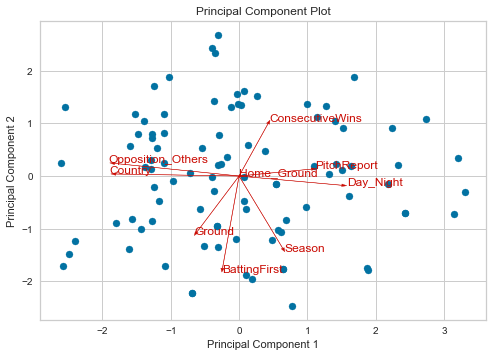

In [28]:
from yellowbrick.features.pca import PCADecomposition
# Create a list of colors to assign to points in the plot
colors = np.array(['r' if yi else 'b' for yi in y])
visualizer = PCADecomposition(scale=True, color=colors)
visualizer.fit_transform(X, y)
visualizer.poof()
#vectors for each feature in the dataset are drawn on the scatter plot in the direction of the maximum variance for that feature. 
#These structures can be used to analyze the importance of a feature to the decomposition or to find features of related variance
#for further analysis.

C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


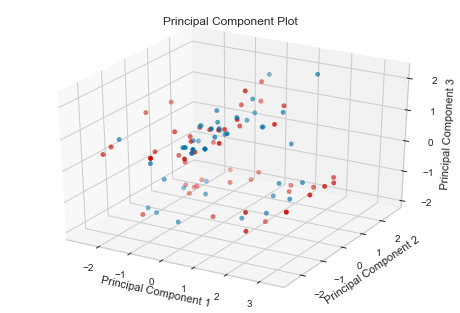

In [27]:
visualizer = PCADecomposition(scale=True, color=colors, proj_dim=3)
visualizer.fit_transform(X, y)
visualizer.poof()


C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


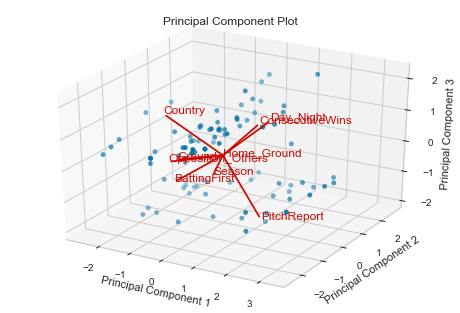

In [29]:
visualizer = PCADecomposition(scale=True, proj_features=True, proj_dim=3)
visualizer.fit_transform(X, y)
visualizer.poof()

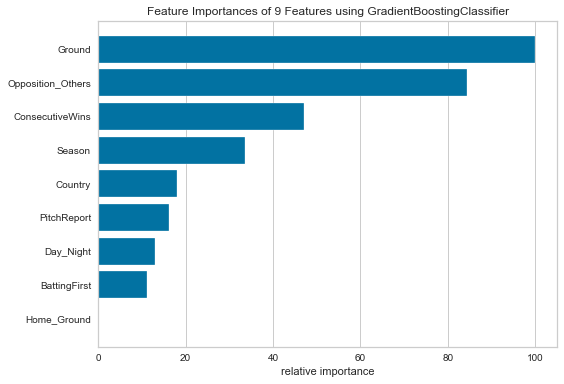

In [40]:
#Finding Important features from the dataset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier

from yellowbrick.features.importances import FeatureImportances

# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
viz.fit(X, y)
viz.poof()
# The above figure shows the features ranked according to the explained variance each feature contributes to the model. 
# In this case the features are plotted against their relative importance, 
# that is the percent importance of the most important feature. 

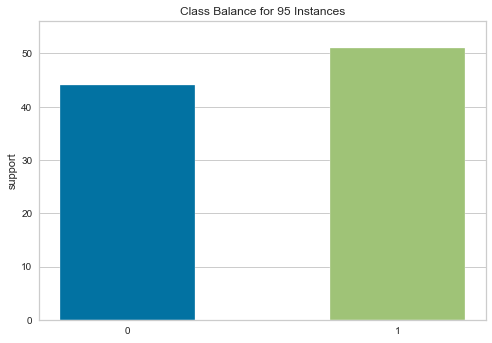

In [50]:
#finding class balance
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=["0", "1"])
visualizer.fit(y)
visualizer.poof()
# The resulting figure allows us to diagnose the severity of the balance issue.

C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


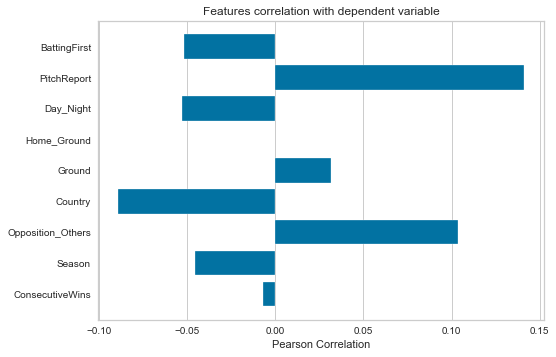

In [52]:
from yellowbrick.target import FeatureCorrelation

features = ['ConsecutiveWins','Season','Opposition_Others','Country','Ground','Home_Ground','Day_Night','PitchReport','BattingFirst']

visualizer = FeatureCorrelation(labels=features)
visualizer.fit(X, y)
visualizer.poof()

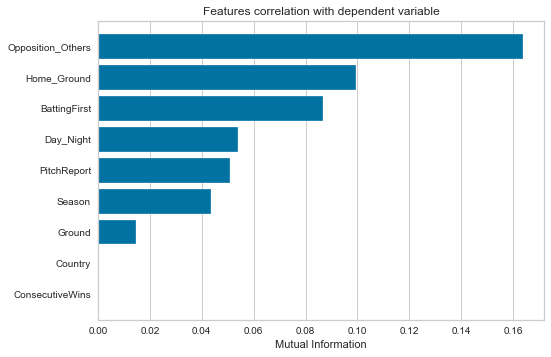

In [53]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(method='mutual_info-classification',
                                feature_names=features, sort=True)
visualizer.fit(X, y, random_state=0)
visualizer.poof()

In [26]:
#spliting in train and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state =1, stratify = y)  

In [56]:
#building the traiinign model
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
knn.fit(X_train,y_train)
# y_score = knn.decision_function(X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [53]:
#show first 5 model predictions on the test data
y_pred = knn.predict(X_test)

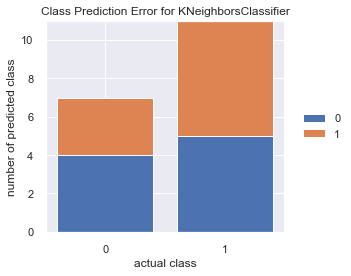

In [54]:
from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(knn, classes=[0,1])

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
g = visualizer.poof()

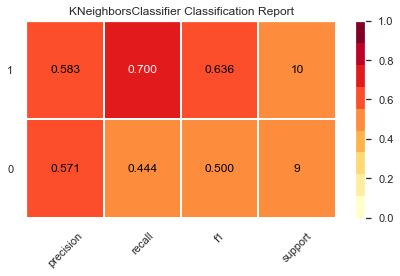

In [55]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(knn, classes=['0','1'], support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

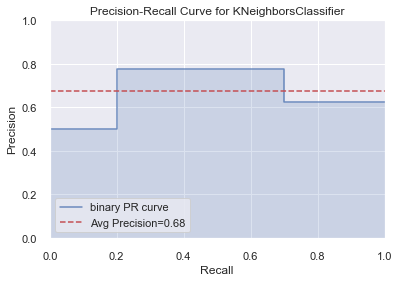

In [32]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and poof it
viz = PrecisionRecallCurve(knn)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()



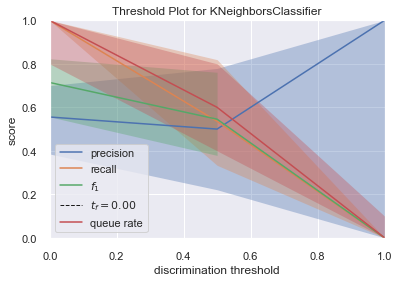

In [33]:

from yellowbrick.classifier import DiscriminationThreshold

# Instantiate the classification model and visualizer
visualizer = DiscriminationThreshold(knn)

visualizer.fit(X, y)  # Fit the training data to the visualizer
visualizer.poof()     # Draw/show/poof the data


The classification report shows a representation of the main classification metrics on a per-class basis. This gives a deeper intuition of the classifier behavior over global accuracy which can mask functional weaknesses in one class of a multiclass problem. Visual classification reports are used to compare classification models to select models that are “redder”, e.g. have stronger classification metrics or that are more balanced.

The metrics are defined in terms of true and false positives, and true and false negatives. Positive and negative in this case are generic names for the classes of a binary classification problem. In the example above, we would consider true and false win and true and false loss. Therefore a true positive is when the actual class is positive as is the estimated class. A false positive is when the actual class is negative but the estimated class is positive. Using this terminology the meterics are defined as follows:

precision
Precision is the ability of a classiifer not to label an instance positive that is actually negative. For each class it is defined as as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”
recall
Recall is the ability of a classifier to find all positive instances. For each class it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”
f1 score
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.
support
Support is the number of actual occurrences of the class in the specified dataset. Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing. Support doesn’t change between models but instead diagnoses the evaluation process.

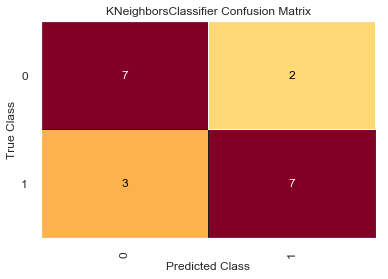

In [34]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(knn, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

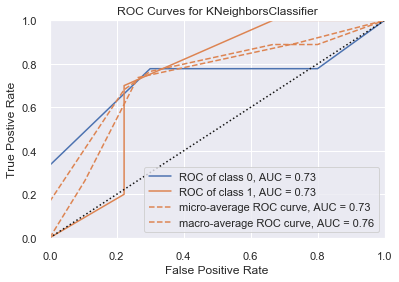

In [35]:
from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(knn, classes=[0,1])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [57]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)
#Our model has an approx of 68%. NOw we see how to increase
# model performance below

0.7368421052631579

***
The k nearest neighbors (kNN) model is commonly used when similarity is important to the interpretation of the model. Choosing k is difficult, the higher k is the more data is included in a classification, creating more complex decision topologies, whereas the lower k is, the simpler the model is and the less it may generalize. Using a validation curve seems like an excellent strategy for choosing k, and often it is. However in the example above, all we can see is a decreasing variability in the cross-validated scores.
***

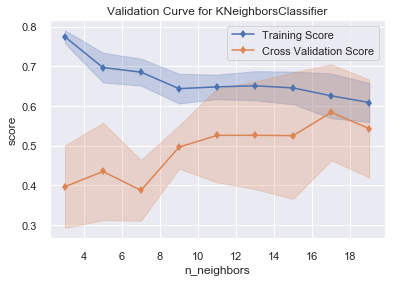

In [37]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve
cv = StratifiedKFold(5)
param_range = np.arange(3, 20, 2)

oz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    param_range=param_range, cv=cv, scoring="f1_weighted", n_jobs=4,
)

# Using the same game dataset as in the SVC example
oz.fit(X, y)
oz.poof()
# The k nearest neighbors (kNN) model is commonly used when similarity is important to the interpretation of the model. 
# Choosing k is difficult, the higher k is the more data is included in a classification, creating more complex decision topologies, 
# whereas the lower k is, the simpler the model is and the less it may generalize.
# Using a validation curve seems like an excellent strategy for choosing k, and often it is.
# However in the example above, all we can see is a decreasing variability in the cross-validated scores.

# This validation curve poses two possibilities: 
# first, that we do not have the correct param_range to find the best k and need to expand our search to larger values. 
# The second is that other hyperparameters (such as uniform or distance based weighting, or even the distance metric) may have more
# influence on the default model than k by itself does. Although validation curves can give us some intuition about the 
# performance of a model to a single hyperparameter, 
# grid search is required to understand the performance of a model with respect to multiple hyperparameters.

If the training and cross validation scores converge together as more data is added (shown in the left figure), then the model will probably not benefit from more data. If the training score is much greater than the validation score (as shown in the right figure) then the model probably requires more training examples in order to generalize more effectively.

The curves are plotted with the mean scores, however variability during cross-validation is shown with the shaded areas that represent a standard deviation above and below the mean for all cross-validations. If the model suffers from error due to bias, then there will likely be more variability around the training score curve. If the model suffers from error due to variance, then there will be more variability around the cross validated score.

Note


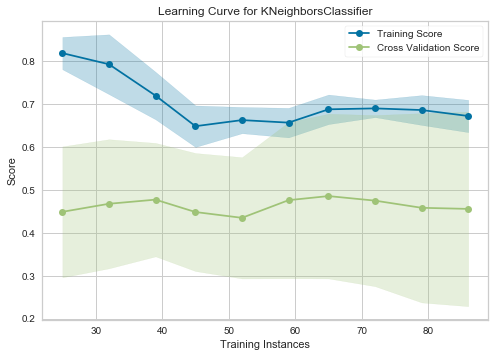

In [64]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve



# Specify the features of interest and the target
target = "Pak_Wins"
# Create the learning curve visualizer
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(
   KNeighborsClassifier(), cv=cv, train_sizes=sizes,
    scoring='f1_weighted', n_jobs=4
)

# Fit and poof the visualizer
viz.fit(X, y)
viz.poof()


This learning curve shows high test variability and a low score up to around 35 instances, however after this level the model begins to converge on an F1 score of around 0.5. We can see that the training and test scores have not yet converged, so potentially this model would benefit from more training data. Finally, this model suffers primarily from error due to variance (the CV scores for the test data are more variable than for training data) so it is possible that the model is overfitting.

In [76]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.45       0.73684211 0.52631579 0.42105263 0.33333333]
cv_scores mean:0.4935087719298246


In [48]:
# Using GridSearchCV to find the optimal value of 'n_neighbors'
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)


C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 17}

In [51]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.5894736842105263

Automatically created module for IPython interactive environment


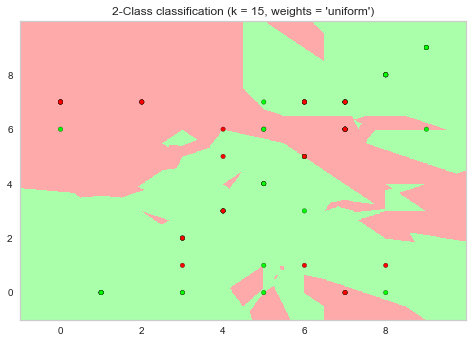

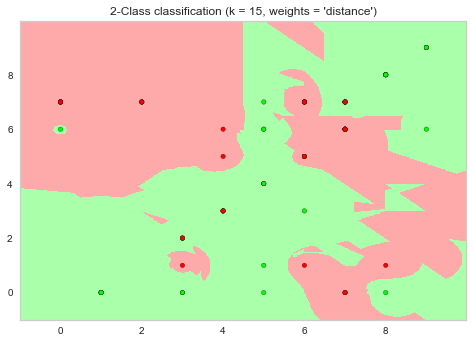

In [19]:
print(__doc__)


n_neighbors = 15


# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = df.drop('Pak_Win', axis=1) 
y = df['Pak_Win'] 
X =X.iloc[:,2:4]

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [45]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = neighbors.KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

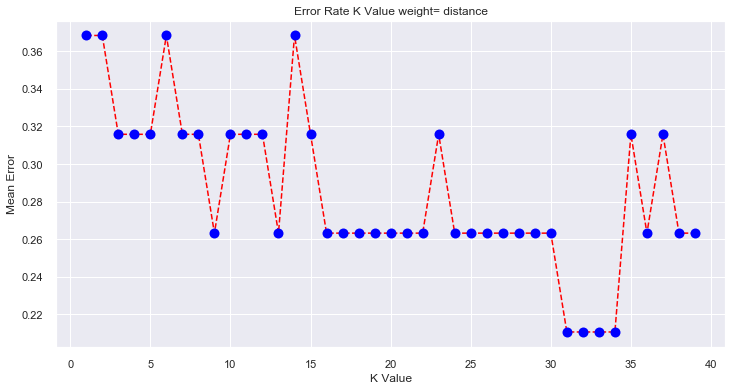

In [46]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value weight= distance')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [ ]:
# https://towardsdatascience.com/modeling-teaching-a-machine-learning-algorithm-to-deliver-business-value-ad0205ca4c86
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
# https://machinelearningmastery.com/metrics-evaluate-machine-learning-algorithms-python/
# https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/